In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_customer = pd.read_csv('../Data/movie_ticket_data/customer.csv')
df_campaign = pd.read_csv('../Data/movie_ticket_data/campaign.csv')
df_device = pd.read_csv('../Data/movie_ticket_data/device_detail.csv')
df_status = pd.read_csv('../Data/movie_ticket_data/status_detail.csv')
df_ticket = pd.read_csv('../Data/movie_ticket_data/ticket_history.csv')

### Data Cleaning

In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [4]:
df_customer.head()

,customer_id,usergender,dob
0,100032,Female,8/8/1985
1,100046,Male,7/11/1987
2,100050,Male,11/19/1994
3,100063,Male,9/10/1999
4,100076,Female,5/14/1995


In [5]:
from datetime import datetime
df_customer['dob'] = pd.to_datetime(df_customer.dob)

In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  131400 non-null  int64         
 1   usergender   131400 non-null  object        
 2   dob          131400 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.0+ MB


In [7]:
df_customer.customer_id.nunique()

131400

In [8]:
df_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [9]:
def calc_null_rate(df):
    newdf = df.isnull().sum().to_frame('null_count')
    newdf['null_rate'] = newdf['null_count']/len(df)
    return newdf.sort_values(by=['null_rate'], ascending=False)

In [10]:
calc_null_rate(df_device)

,null_count,null_rate
model,7139,0.051029
device_number,1,0.000007
platform,0,0.000000


In [11]:
df_device = df_device.fillna({'model':'unknown'})
df_device = df_device[df_device.device_number.notna()]

In [12]:
df_status.head()

,status_id,description,error_group
0,1,Order successful,NaN
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please...,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect atte...,customer


In [13]:
df_ticket.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder


In [14]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [15]:
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

In [16]:
df_ticket.ticket_id.nunique()

154725

In [17]:
df_ticket_dup = df_ticket[df_ticket.duplicated(keep=False)]
df_ticket_dup.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
3555,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
3556,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
49730,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49731,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49876,257d0a0e6a7f38b90b5ecdfa9e8416b9,133912,money in app,119.0,18abc497c03f7e6bd0b0cf72a89fb911,7.42,0.00,7.42,2019-12-23 18:04:51.790,1,0,Dreamy Eyes


In [18]:
df_ticket.drop_duplicates(inplace=True)

In [19]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154725 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 15.3+ MB


In [20]:
df_join_customer = pd.merge(df_ticket, df_customer, how='left', on="customer_id")
df_join_campaign = pd.merge(df_join_customer, df_campaign, how='left', on="campaign_id")
df_join_status = pd.merge(df_join_campaign, df_status, how='left', on="status_id")
df_join_all = pd.merge(df_join_status, df_device, how='left', on="device_number")

In [21]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,NaN,"iPhone13,1",mobile
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,NaN,browser,website
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,NaN,Order successful,NaN,unknown,mobile
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,NaN,devicemodel,mobile
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,NaN,devicemodel,mobile


In [22]:
calc_null_rate(df_join_all)

,null_count,null_rate
error_group,133679,0.863978
campaign_type,63098,0.407807
platform,78,0.000504
model,78,0.000504
campaign_id,0,0.000000
description,0,0.000000
dob,0,0.000000
usergender,0,0.000000
movie_name,0,0.000000
ticket_id,0,0.000000


In [23]:
df_join_all = df_join_all.fillna('unknown')

In [24]:
calc_null_rate(df_join_all)

,null_count,null_rate
ticket_id,0,0.0
campaign_id,0,0.0
model,0,0.0
error_group,0,0.0
description,0,0.0
campaign_type,0,0.0
dob,0,0.0
usergender,0,0.0
movie_name,0,0.0
status_id,0,0.0


### View all value of each column

In [25]:
df_join_all.nunique().sort_values(ascending=False)

ticket_id         154725
time              154725
device_number     126459
customer_id       119477
dob                11322
final_price         2715
original_price      1895
model               1215
movie_name           253
discount_value       242
campaign_id          211
theater_name         179
description            8
status_id              8
paying_method          5
campaign_type          4
error_group            4
usergender             3
platform               3
dtype: int64

In [26]:
import numpy as np
cols = ['movie_name', 'description', 'paying_method', 'campaign_type', 'usergender', 'platform', 'error_group']
for col in cols:
    print(col + ' : ', np.sort(df_join_all[col].unique().astype(str)))
    print('\r')
    print('-----------------')
    print('\r')

movie_name :  ['13rd Sister' '13rd Sister: Three Deadly Days' '1990' '2037'
 '30 Chua Phai Tet' '47 Meters Down: Uncaged' 'A Chamada Da Selva'
 'A Diamond In The Rough' 'Accidentally Dad' 'Aladdin' 'Alienoid'
 'Alita: Battle Angel' 'Ambulance' 'Anchor' 'Angel Has Fallen' 'Anna'
 'Annabelle Comes Home' 'Aquaman' 'Around The World In 80 Days'
 'Autumn Promise' 'Avatar' 'Avatar: The Way Of Water' 'Avengers: Endgame'
 'Bad Boys For Life' 'Batman' 'Beast' 'Birds Of Prey' 'Black Adam'
 'Black Panther 2: Wakanda Forever' 'Black Panther: Wakanda Forever'
 'Blood Karma' 'Blood Moon Party' 'Bloodshot' 'Broker' 'Bullet Train'
 'Bumblebee' 'Bắc Kim Thang' 'Camellia Sisters' 'Captain Marvel'
 "Charlie's Angels" 'Cherry Magic The Movie Thirty Years'
 'Chickenhare And The Hamster Of Darkness' 'Chuyện Ma Đô Thị' 'Collectors'
 'Concessions' 'Confidential Assignment 2: International' 'Cracked'
 'Crawl' 'Crazy Romance' "Dad I'm Sorry" 'Daddy Issues' 'Daeng'
 'Dark Figure Of Crime' 'Dc League Of Super-Pet

## 3. Analyze

### 3.1 Customer portrait

#### Age and gender distribution

In [27]:
current_date = datetime.now()
df_join_all['age_days'] = (current_date - df_join_all.dob).dt.days
df_join_all['age'] = df_join_all.age_days/365.25
df_join_all['age'] = df_join_all['age'].astype(int)

In [28]:
df_cus = df_join_all.drop_duplicates(subset=['customer_id'])[['customer_id', 'age', 'usergender']]

In [29]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119477 entries, 0 to 154724
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  119477 non-null  int64 
 1   age          119477 non-null  int32 
 2   usergender   119477 non-null  object
dtypes: int32(1), int64(1), object(1)
memory usage: 3.2+ MB


In [30]:
df_cus.head()

,customer_id,age,usergender
0,100009,36,Male
1,100493,33,Male
2,100596,35,Male
3,100852,27,Male
4,100965,36,Male


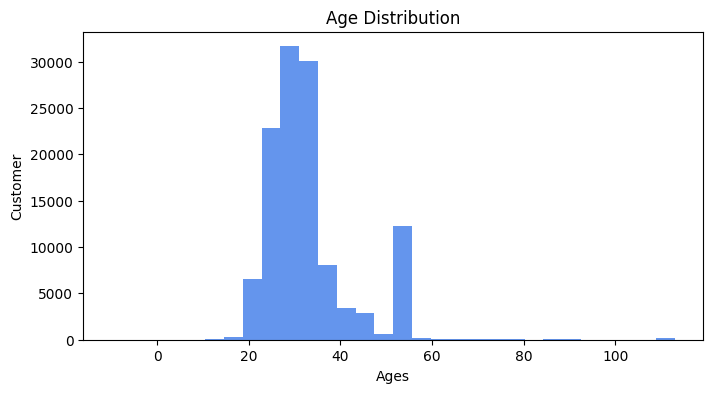

In [31]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(8, 4))
df_cus.age.hist(bins=30, color= 'cornflowerblue', grid=False)
plt.xlabel('Ages')
plt.ylabel('Customer')
plt.title('Age Distribution')
plt.show()

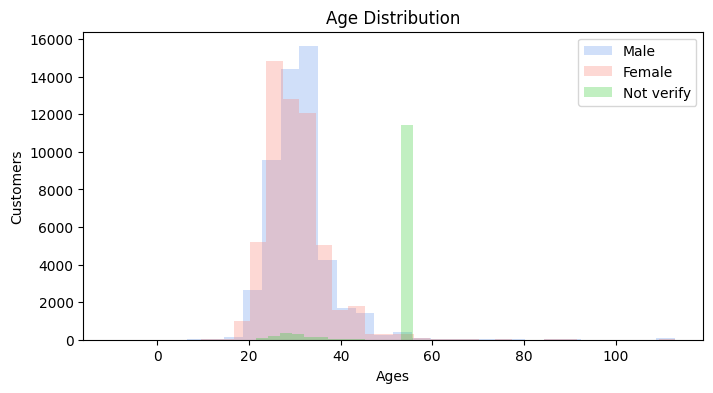

In [32]:
plt.figure(figsize=(8, 4))

male_age = df_cus[df_cus.usergender == 'Male']['age']
female_age = df_cus[df_cus.usergender == 'Female']['age']
unknown_age = df_cus[df_cus.usergender == 'Not verify']['age']

plt.hist(male_age, bins=30, alpha=0.3, color='cornflowerblue', label='Male')
plt.hist(female_age, bins=30, alpha=0.3, color='salmon', label='Female')
plt.hist(unknown_age, bins=30, alpha=0.3, color='limegreen', label='Not verify')

plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Customers')
plt.legend()
plt.show()

In [33]:
# Đánh giá chi tiết not verify
df_gen = df_cus.groupby('usergender').agg(total_customer=('customer_id', 'count')).reset_index().sort_values(by='total_customer', ascending=False)

In [34]:
df_gen

,usergender,total_customer
0,Female,55689
1,Male,50873
2,Not verify,12915


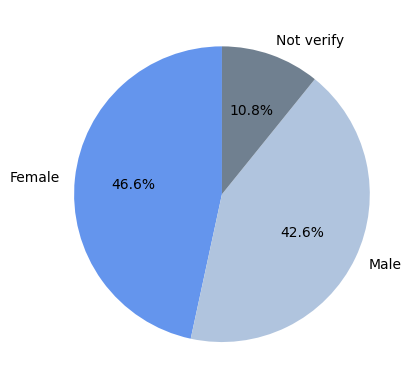

In [35]:
plt.pie(df_gen['total_customer'], labels=df_gen.usergender, colors=['cornflowerblue', 'lightsteelblue', 'slategrey'], autopct='%1.1f%%', startangle=90)
plt.show()

In [36]:
df_cus[df_cus.usergender=='Not verify'].groupby('age').agg(total_cus = ('customer_id', 'count')).reset_index().sort_values(by='total_cus', ascending=False).head()

,age,total_cus
39,55,11434
13,29,127
11,27,118
15,31,118
14,30,112


>**Notes**
>- Nhóm KH chưa verify tài khoản chiếm hơn 10%. Dẫ tới 2 trường hợp:
>>- Nếu họ nhập dob thì sẽ có data
>>- Nếu họ không nhập thì hệ thống sẽ auto lưu là 1970 -> 54 tuổi

### 3.2 Time series data

In [37]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,...,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,...,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13189,36
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,...,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12355,33


In [38]:
df_join_all['month'] = pd.to_datetime(df_join_all.time).dt.month
df_join_all['day_of_week'] = pd.to_datetime(df_join_all.time).dt.day_name()
df_join_all['hour'] = pd.to_datetime(df_join_all.time).dt.hour
df_join_all['year_month'] = pd.to_datetime(df_join_all.time).dt.strftime('%Y-%m')

In [39]:
# Thống kê theo tháng
df_time_month = df_join_all.groupby('year_month').agg(total_ticket = ('ticket_id', 'count')).reset_index()

In [40]:
df_time_month.head()

,year_month,total_ticket
0,2019-01,2019
1,2019-02,1626
2,2019-03,1004
3,2019-04,4069
4,2019-05,4430


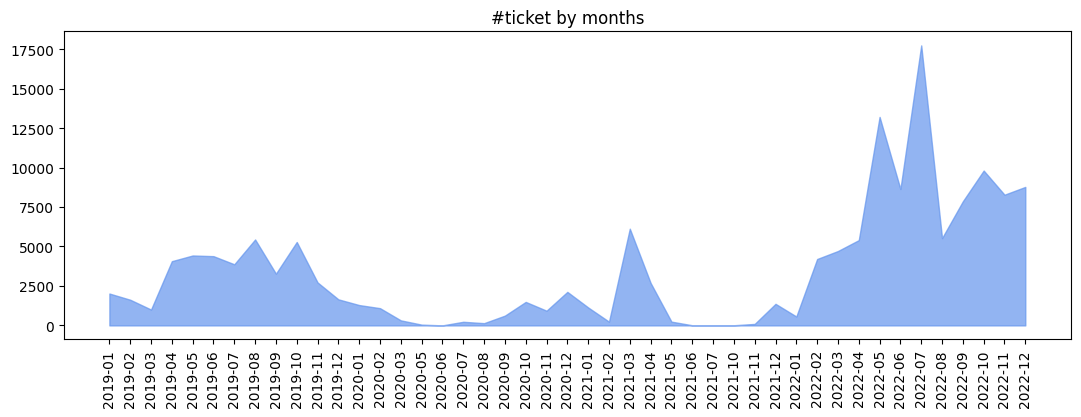

In [41]:
plt.figure(figsize=(13, 4))

plt.fill_between(df_time_month.year_month, df_time_month.total_ticket, color='cornflowerblue', alpha=0.7)
plt.title('#ticket by months')
plt.xticks(rotation=90)
plt.show()

In [42]:
## Giai đoạn covid diễn ra --> số lượng người đi xem phim giảm

In [43]:
### Tạo bảng DIM thời gian
start_date = '2019-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
list_month = date_range.month
list_month_name = date_range.strftime('%B')
list_year = date_range.month
list_year_month = date_range.strftime('%Y-%m')

dim_date = pd.DataFrame({
            'month_number': list_month,
            'month_name': list_month_name,
            'year': list_year,
            'year_month': list_year_month
})

In [44]:
df_time_month = pd.merge(dim_date, df_join_all, how='left', on='year_month').groupby('year_month').agg(total_ticket = ('ticket_id', 'count')).reset_index()

In [45]:
df_time_month.replace(0, np.nan, inplace=True)

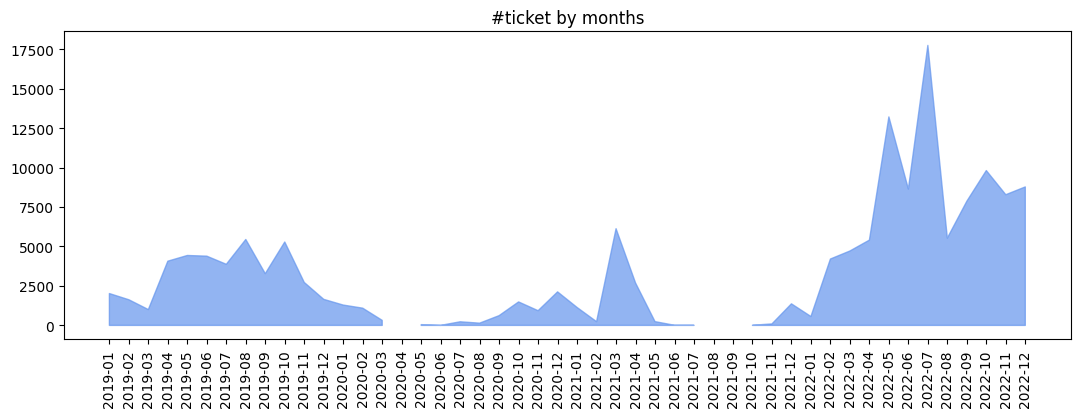

In [46]:
plt.figure(figsize=(13, 4))

plt.fill_between(df_time_month.year_month, df_time_month.total_ticket, color='cornflowerblue', alpha=0.7)
plt.title('#ticket by months')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Thống kê theo ngày trong tuần
df_week_day = df_join_all.groupby('day_of_week').agg(total_ticket = ('ticket_id', 'count')).reset_index()

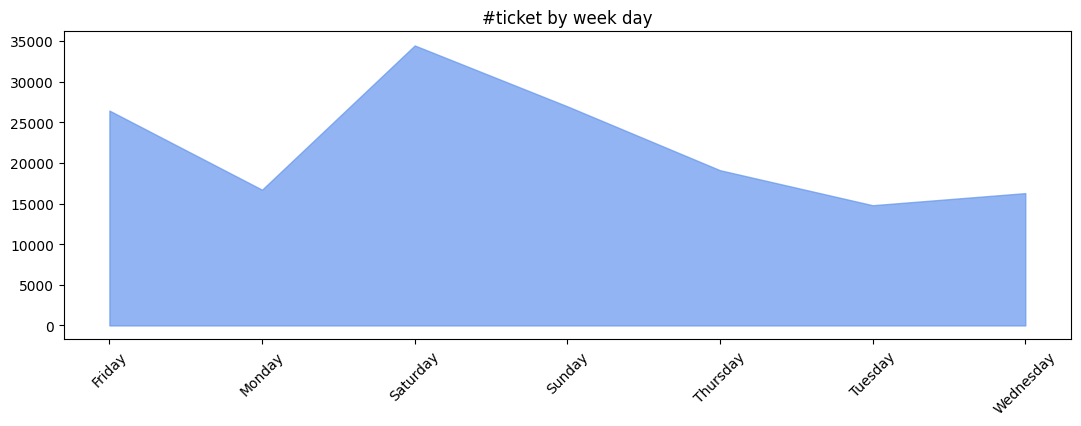

In [48]:
plt.figure(figsize=(13, 4))

plt.fill_between(df_week_day.day_of_week, df_week_day.total_ticket, color='cornflowerblue', alpha=0.7)
plt.title('#ticket by week day')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Sắp xếp thứ tự các ngày trong tuần
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_week_day['day_order'] = pd.Categorical(df_week_day['day_of_week'], categories=week_order, ordered=True)
df_week_day.sort_values('day_order', inplace=True)

In [50]:
df_week_day

,day_of_week,total_ticket,day_order
1,Monday,16702,Monday
5,Tuesday,14793,Tuesday
6,Wednesday,16281,Wednesday
4,Thursday,19101,Thursday
0,Friday,26438,Friday
2,Saturday,34450,Saturday
3,Sunday,26960,Sunday


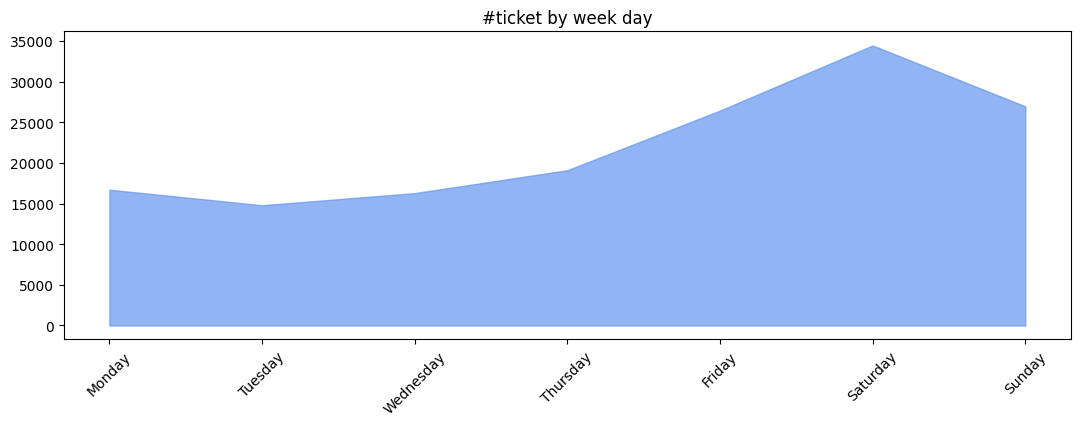

In [51]:
plt.figure(figsize=(13, 4))

plt.fill_between(df_week_day.day_of_week, df_week_day.total_ticket, color='cornflowerblue', alpha=0.7)
plt.title('#ticket by week day')
plt.xticks(rotation=45)
plt.show()

In [52]:
# Thống kê theo giờ
df_hour = df_join_all.groupby('hour').agg(total_ticket=('ticket_id', 'count')).reset_index()
df_hour.head()

,hour,total_ticket
0,0,2352
1,1,964
2,2,398
3,3,159
4,4,74


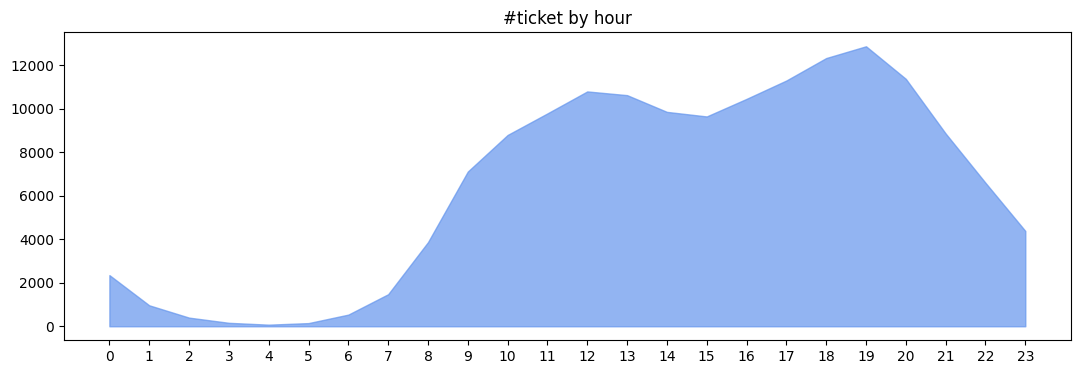

In [53]:
plt.figure(figsize=(13, 4))

plt.fill_between(df_hour.hour, df_hour.total_ticket, color='cornflowerblue', alpha=0.7)
x_values = [i for i in range(24)]
plt.title('#ticket by hour')
plt.xticks(x_values)
plt.show()

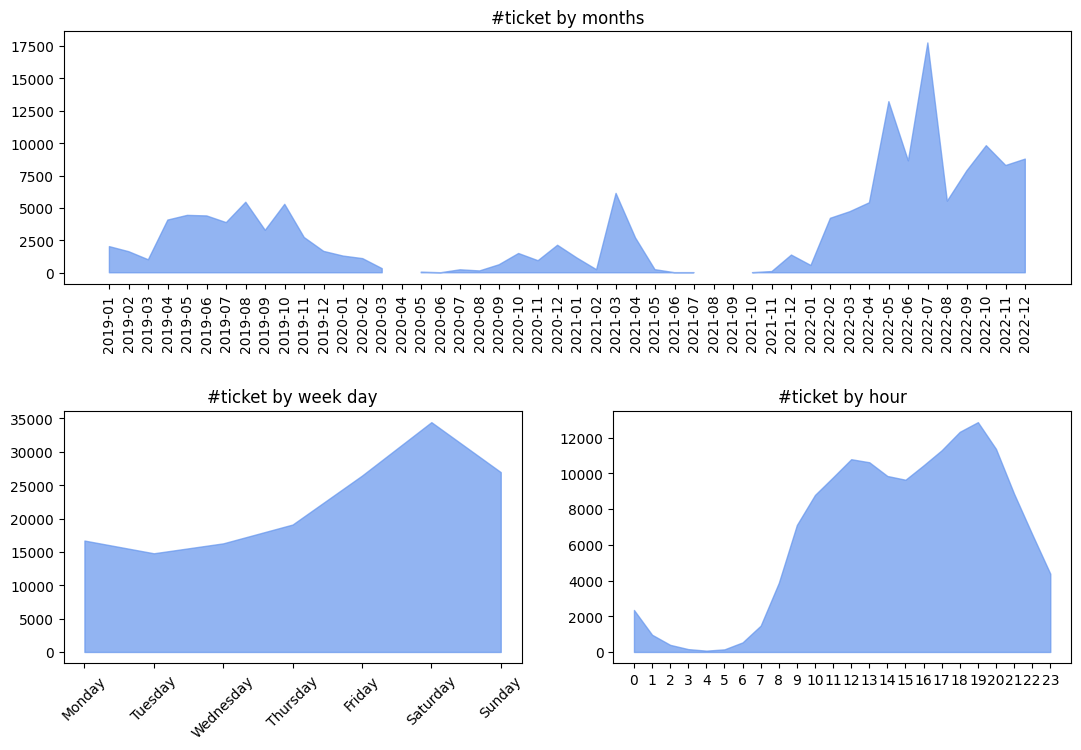

In [54]:
plt.figure(figsize=(13, 8))

# Month
ax1 = plt.subplot(2,1,1)
plt.fill_between(df_time_month.year_month, df_time_month.total_ticket, color='cornflowerblue', alpha=0.7)
plt.title('#ticket by months')
plt.xticks(rotation=90)

# Week Day
ax2 = plt.subplot(2, 2, 3)
plt.fill_between(df_week_day.day_of_week, df_week_day.total_ticket, color='cornflowerblue', alpha=0.7)
plt.title('#ticket by week day')
plt.xticks(rotation=45)

#Hour
ax3 = plt.subplot(2, 2, 4)
plt.fill_between(df_hour.hour, df_hour.total_ticket, color='cornflowerblue', alpha=0.7)
x_values = [i for i in range(24)]
plt.title('#ticket by hour')
plt.xticks(x_values)

plt.subplots_adjust(hspace=0.5, top=0.9)
plt.show()

### 3.3 Factors related to the customer's purchasing process

In [55]:
# Payment platform

In [56]:
df_platform = df_join_all[df_join_all.platform != 'unknown'].groupby('platform').agg(total_ticket = ('ticket_id', 'count')).reset_index()

In [57]:
df_platform

,platform,total_ticket
0,mobile,138136
1,website,16511


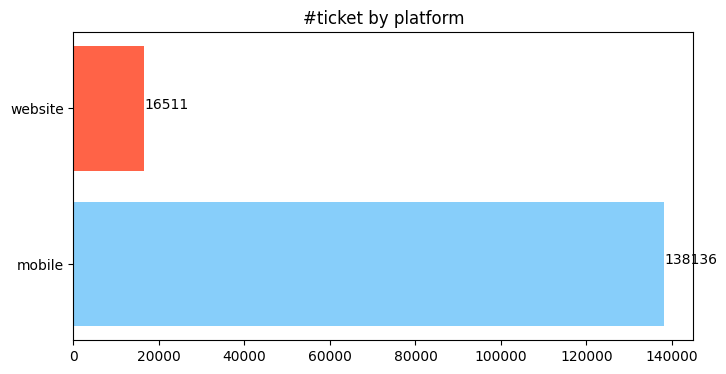

In [58]:
plt.figure(figsize=(8,4))
plt.barh(df_platform.platform, df_platform.total_ticket
         ,color= df_platform['platform'].replace({'mobile': 'lightskyblue', 'website': 'tomato'}))

for index, value in enumerate(df_platform['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by platform')
plt.show()

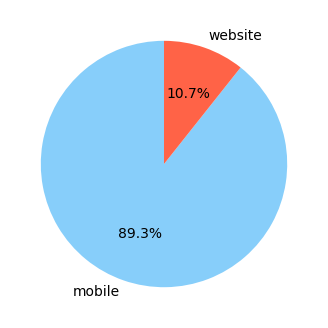

In [59]:
plt.figure(figsize=(6, 4))
plt.pie(df_platform['total_ticket'], labels=df_platform.platform, colors=df_platform['platform'].replace({'mobile': 'lightskyblue', 'website': 'tomato'}), autopct='%1.1f%%', startangle=90)
plt.show()

In [60]:
# Theo thời gian
df_platform_time = (df_join_all[df_join_all.platform != 'unknown']
                    .groupby(['year_month', 'platform'])
                    .agg(total_ticket = ('ticket_id', 'count'))
                    .sort_values(by='year_month', ascending=True)
                    .reset_index()
                   )

In [61]:
df_platform_time.head()

,year_month,platform,total_ticket
0,2019-01,mobile,2019
1,2019-02,mobile,1626
2,2019-03,mobile,1004
3,2019-04,mobile,4069
4,2019-05,mobile,4430


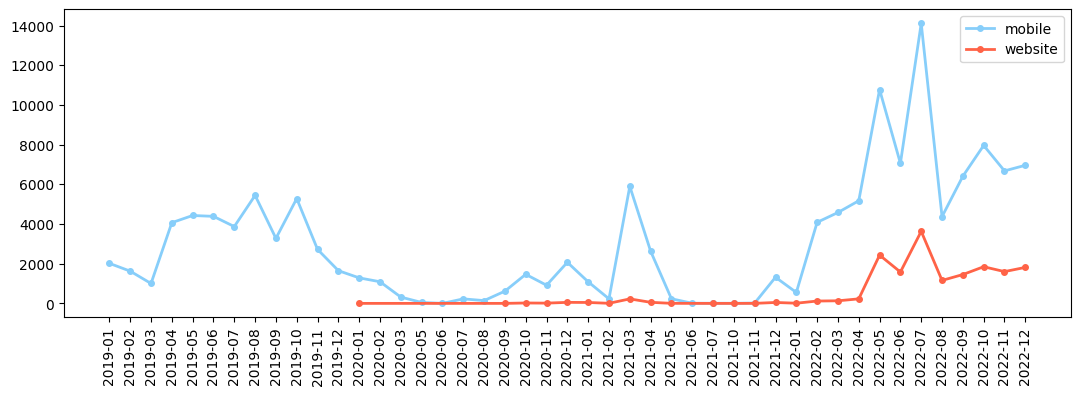

In [62]:
plt.figure(figsize=(13, 4))

df_mobile_line = df_platform_time[df_platform_time.platform == 'mobile']
plt.plot(df_mobile_line.year_month, df_mobile_line.total_ticket, label='mobile', marker='o', color='lightskyblue', linewidth=2, markersize=4)

df_web_line = df_platform_time[df_platform_time.platform == 'website']
plt.plot(df_web_line.year_month, df_web_line.total_ticket, label='website', marker='o', color='tomato', linewidth=2, markersize=4)

plt.legend()
plt.xticks(rotation=90)
plt.show()

### OS Version

In [63]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,...,description,error_group,model,platform,age_days,age,month,day_of_week,hour,year_month
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,...,Order successful,unknown,"iPhone13,1",mobile,13189,36,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,...,Order successful,unknown,browser,website,12355,33,7,Friday,20,2022-07


In [69]:
# Phân loại thiết vị OS Version thành các nhóm: android, IOS, browser, unknown
df_join_all['os_version'] = df_join_all.model.apply(lambda x: 'ios' if ('iPhone' in x or 'iPod' in x)
                                                  else 'browser' if 'browser' in x
                                                  else 'unknown' if ('devicemodel' in x or 'unknown' in x)
                                                  else 'android & others')

In [70]:
# df_join_all.drop(columns='os_version', inplace=True)

In [71]:
df_join_all.os_version.unique()

array(['ios', 'browser', 'unknown', 'android & others'], dtype=object)

In [72]:
# Group by để thống kê
df_os = (df_join_all
                    .groupby('os_version')
                    .agg(total_ticket = ('ticket_id', 'count'))
                    .sort_values(by='total_ticket', ascending=True)
                    .reset_index()
                   )

In [73]:
df_os

,os_version,total_ticket
0,browser,13377
1,android & others,21092
2,ios,51402
3,unknown,68854


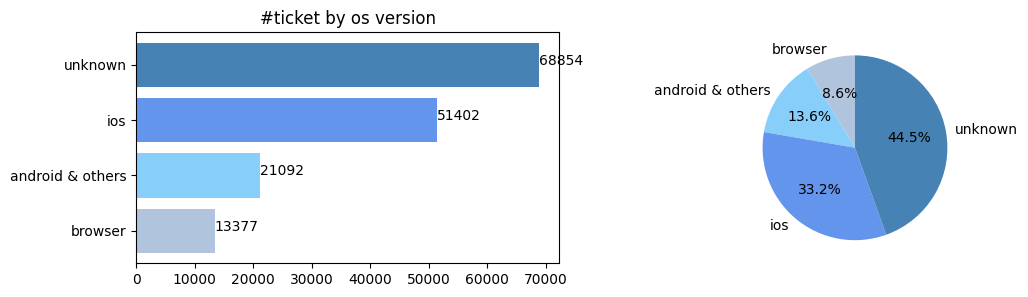

In [74]:
plt.figure(figsize=(12,3))

ax1 = plt.subplot(1,2,1)
plt.barh(df_os.os_version, df_os.total_ticket
         ,color= df_os.os_version.replace({'browser': 'lightsteelblue', 'android & others': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}))

for index, value in enumerate(df_os['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by os version')

ax2 = plt.subplot(1,2,2)
plt.pie(df_os['total_ticket']
        , labels=df_os.os_version
        , colors=df_os.os_version.replace({'browser': 'lightsteelblue', 'android & others': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'})
        , autopct='%1.1f%%'
        , startangle=90)

plt.show()

In [75]:
# Theo thời gian
df_os_time = (df_join_all
                    .groupby(['year_month', 'os_version'])
                    .agg(total_ticket = ('ticket_id', 'count'))
                    .sort_values(by='year_month', ascending=True)
                    .reset_index()
                   )

In [76]:
df_os_time.head()

,year_month,os_version,total_ticket
0,2019-01,android & others,713
1,2019-01,ios,1233
2,2019-01,unknown,73
3,2019-02,android & others,542
4,2019-02,ios,1074


In [77]:
# Xử lý data dạng pivot vẽ biểu đồ miền
df_os_time = (
    df_join_all
    .pivot_table(index = 'year_month', columns = 'os_version', aggfunc='count', values='ticket_id')
    .reset_index()
)

In [78]:
df_os_time.head(10)

os_version,year_month,android & others,browser,ios,unknown
0,2019-01,713.0,NaN,1233.0,73.0
1,2019-02,542.0,NaN,1074.0,10.0
2,2019-03,371.0,NaN,631.0,2.0
3,2019-04,1519.0,NaN,2541.0,9.0
4,2019-05,1601.0,NaN,2826.0,3.0
5,2019-06,1575.0,NaN,2808.0,4.0
6,2019-07,1373.0,NaN,2499.0,NaN
7,2019-08,1797.0,NaN,3642.0,5.0
8,2019-09,1122.0,NaN,2151.0,5.0
9,2019-10,1964.0,NaN,3313.0,7.0


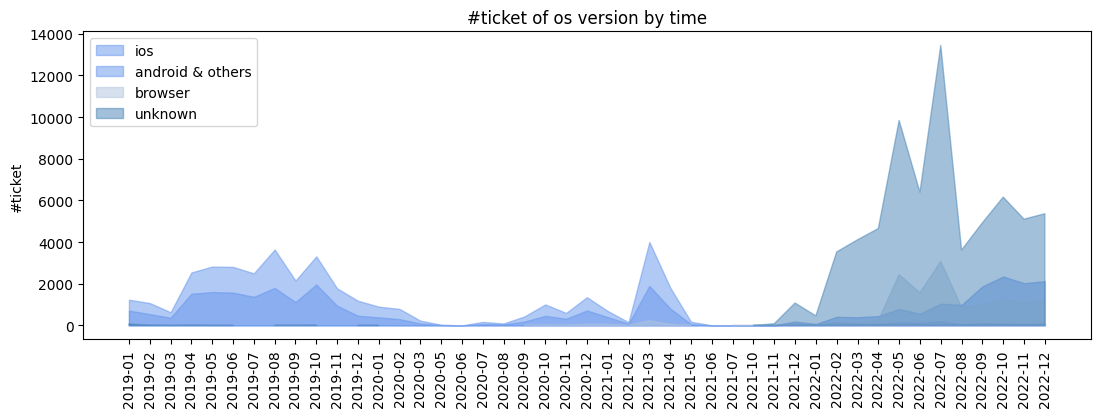

In [79]:
plt.figure(figsize=(13, 4))
plt.fill_between(df_os_time['year_month'], df_os_time.ios, color='cornflowerblue', alpha=0.5, label='ios')
plt.fill_between(df_os_time['year_month'], df_os_time['android & others'], color='cornflowerblue', alpha=0.5, label='android & others')
plt.fill_between(df_os_time['year_month'], df_os_time.browser, color='lightsteelblue', alpha=0.5, label='browser')
plt.fill_between(df_os_time['year_month'], df_os_time.unknown, color='steelblue', alpha=0.5, label='unknown')

plt.title('#ticket of os version by time')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

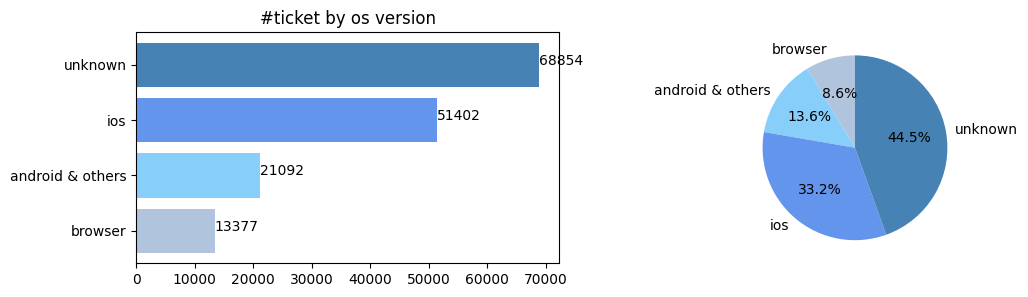

In [80]:
# Biểu diễn chung 1 frame
plt.figure(figsize=(12,3))

ax1 = plt.subplot(1,2,1)
plt.barh(df_os.os_version, df_os.total_ticket
         ,color= df_os.os_version.replace({'browser': 'lightsteelblue', 'android & others': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}))

for index, value in enumerate(df_os['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by os version')

ax2 = plt.subplot(1,2,2)
plt.pie(df_os['total_ticket']
        , labels=df_os.os_version
        , colors=df_os.os_version.replace({'browser': 'lightsteelblue', 'android & others': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'})
        , autopct='%1.1f%%'
        , startangle=90)

# ax3 = plt.subplot(2,1,2)
# plt.fill_between(df_os_time['year_month'], df_os_time.ios, color='cornflowerblue', alpha=0.5, label='ios')
# plt.fill_between(df_os_time['year_month'], df_os_time['android & others'], color='cornflowerblue', alpha=0.5, label='android & others')
# plt.fill_between(df_os_time['year_month'], df_os_time.browser, color='lightsteelblue', alpha=0.5, label='browser')
# plt.fill_between(df_os_time['year_month'], df_os_time.unknown, color='steelblue', alpha=0.5, label='unknown')

# plt.title('#ticket of os version by time')
# plt.ylabel('#ticket')
# plt.legend(loc='upper left')
# plt.xticks(rotation=90)

# plt.subplots_adjust(hspace=0.5, top=0.9)
plt.show()

### Customer Retention - Cohort Analysis

In [81]:
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

In [97]:
# Bước 1: Tính cohort(first_month), current_month, subsequent_month
df_selected_time = df_join_all[(df_join_all.time >= '2022-01-01') & (df_join_all.status_id == 1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time.time.dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

In [98]:
df_selected_time.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,...,age_days,age,month,day_of_week,hour,year_month,os_version,first_month,current_month,subsequent_month
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,...,13189,36,7,Friday,17,2022-07,ios,2022-07,2022-07,0
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,...,12355,33,7,Friday,20,2022-07,browser,2022-07,2022-07,0
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,...,13107,35,7,Saturday,11,2022-07,unknown,2022-07,2022-07,0
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,...,10080,27,7,Monday,22,2022-07,unknown,2022-07,2022-07,0
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,...,13347,36,7,Sunday,18,2022-07,unknown,2022-07,2022-07,0


In [99]:
# Bước 2: Group by cohort
df_cohort = (
            df_selected_time
            .groupby(['first_month', 'current_month', 'subsequent_month'])
            .agg(n_customers = ('customer_id', 'nunique'))
            .reset_index(drop=False)
)

In [100]:
df_cohort

,first_month,current_month,subsequent_month,n_customers
0,2022-01,2022-01,0,474
1,2022-01,2022-02,1,31
2,2022-01,2022-03,2,24
3,2022-01,2022-04,3,25
4,2022-01,2022-05,4,30
...,...,...,...,...
73,2022-10,2022-11,1,230
74,2022-10,2022-12,2,179
75,2022-11,2022-11,0,5841
76,2022-11,2022-12,1,188


In [101]:
df_cohort_pivot = (
    df_cohort.pivot_table(index = 'first_month', columns='subsequent_month', values='n_customers')
)

In [102]:
df_cohort_pivot

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2022-01,474.0,31.0,24.0,25.0,30.0,23.0,28.0,13.0,20.0,13.0,20.0,25.0
2022-02,3212.0,94.0,99.0,160.0,120.0,161.0,77.0,90.0,117.0,68.0,81.0,NaN
2022-03,3675.0,117.0,157.0,111.0,188.0,83.0,106.0,115.0,110.0,90.0,NaN,NaN
2022-04,4240.0,218.0,126.0,204.0,84.0,109.0,126.0,127.0,99.0,NaN,NaN,NaN
2022-05,10365.0,324.0,488.0,143.0,207.0,263.0,253.0,214.0,NaN,NaN,NaN,NaN
2022-06,6511.0,307.0,139.0,166.0,157.0,141.0,143.0,NaN,NaN,NaN,NaN,NaN
2022-07,13630.0,252.0,303.0,344.0,295.0,270.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,4069.0,139.0,135.0,110.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,5843.0,194.0,155.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
cohort_size = df_cohort_pivot.iloc[:, 0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis=0)

In [104]:
retention_matrix

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2022-01,1.0,0.065401,0.050633,0.052743,0.063291,0.048523,0.059072,0.027426,0.042194,0.027426,0.042194,0.052743
2022-02,1.0,0.029265,0.030822,0.049813,0.037360,0.050125,0.023973,0.028020,0.036426,0.021171,0.025218,NaN
2022-03,1.0,0.031837,0.042721,0.030204,0.051156,0.022585,0.028844,0.031293,0.029932,0.024490,NaN,NaN
2022-04,1.0,0.051415,0.029717,0.048113,0.019811,0.025708,0.029717,0.029953,0.023349,NaN,NaN,NaN
2022-05,1.0,0.031259,0.047082,0.013796,0.019971,0.025374,0.024409,0.020646,NaN,NaN,NaN,NaN
2022-06,1.0,0.047151,0.021348,0.025495,0.024113,0.021656,0.021963,NaN,NaN,NaN,NaN,NaN
2022-07,1.0,0.018489,0.022230,0.025238,0.021643,0.019809,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,1.0,0.034161,0.033178,0.027034,0.025313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,1.0,0.033202,0.026527,0.024474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


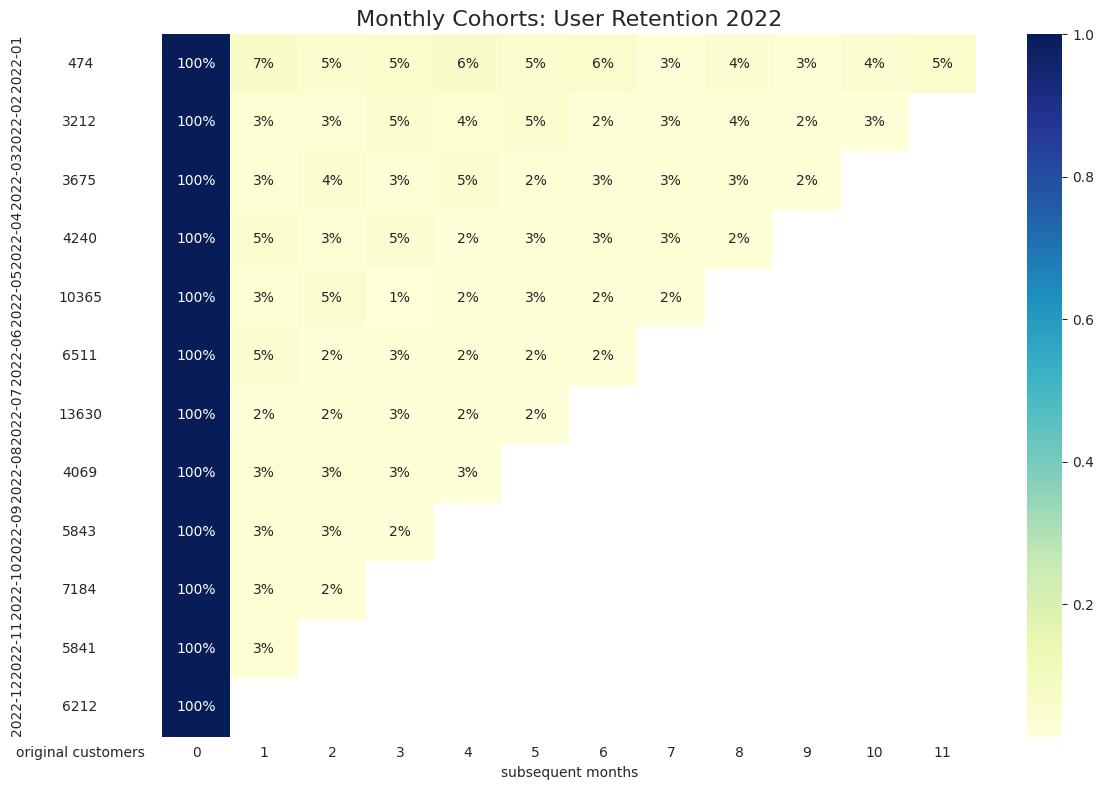

In [105]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1,11]})

    #retension matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1]
               )
    ax[1].set_title('Monthly Cohorts: User Retention 2022', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')


    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'}) 
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])
    # for ax_item in ax:
    #     ax_item.set_yticklabels(ax_item.get_yticklabels(), rotation=90)
    ax[0].set_ylabel('')
    ax[1].set_ylabel('')

    fig.tight_layout()

In [261]:
cohort_size_df.head()

,original customers
first_month,
2019-01,1348.0
2019-02,1293.0
2019-03,745.0
2019-04,2922.0
2019-05,3226.0


## Payment success rate

In [257]:
def calculate_n_success(x):
    return (x == 1).sum()

df_sr = (
    df_join_all
    .groupby('year_month')
    .agg(n_ords = ('ticket_id', 'count'),
        n_success = ('status_id', calculate_n_success))
    .assign(success_rate = lambda x: (x['n_success'] / x['n_ords']) * 100)
    .reset_index()
)

In [260]:
df_sr.head()

,year_month,n_ords,n_success,success_rate
0,2019-01,2019,1359,67.310550
1,2019-02,1626,1427,87.761378
2,2019-03,1004,866,86.254980
3,2019-04,4069,3190,78.397641
4,2019-05,4430,3617,81.647856
